 EDA Topic:
 PREDICT WORKFORCE REQUIREMENT USING MACHINE LEARNING ALGORITHMS AND ANALYSIS
 
Group Members:GROUP(9)

•	Abhay Korat – 0779708
•	Nishtha Vijay Mistri – 0780925
•	Kuldeep Thakor – 0770272
•	Ashish Thomas Alex – 0787653

In [1]:
# Import all necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
# Loading dataset
data = pd.read_csv("F:\Semester-4\Capstone\Dataset\Dataset_1.csv")

## Understanding the Data

In [3]:
# To view first five row of the dataset
data.head()

,REF_DATE,GEO,DGUID,Labour force characteristics,North American Industry Classification System (NAICS),Sex,Age group,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1976,Canada,2016A000011124,Labour force,"Total, all industries",Both sexes,15 years and over,Persons,249,thousands,3,v2363353,1.1.1.1.1,10491.3,NaN,NaN,NaN,1
1,1976,Canada,2016A000011124,Labour force,"Total, all industries",Both sexes,15 to 24 years,Persons,249,thousands,3,v19668072,1.1.1.1.2,2891.9,NaN,NaN,NaN,1
2,1976,Canada,2016A000011124,Labour force,"Total, all industries",Both sexes,25 to 54 years,Persons,249,thousands,3,v19668073,1.1.1.1.3,6410.7,NaN,NaN,NaN,1
3,1976,Canada,2016A000011124,Labour force,"Total, all industries",Both sexes,55 years and over,Persons,249,thousands,3,v19668074,1.1.1.1.4,1188.7,NaN,NaN,NaN,1
4,1976,Canada,2016A000011124,Labour force,"Total, all industries",Males,15 years and over,Persons,249,thousands,3,v2363523,1.1.1.2.1,6549.6,NaN,NaN,NaN,1


In [4]:
# To view last five row of the dataset
data.tail()

,REF_DATE,GEO,DGUID,Labour force characteristics,North American Industry Classification System (NAICS),Sex,Age group,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
953827,2021,British Columbia,2016A000259,Unemployment rate,Public administration [91],Males,55 years and over,Percentage,242,units,0,v19684898,11.6.28.2.4,NaN,x,NaN,NaN,1
953828,2021,British Columbia,2016A000259,Unemployment rate,Public administration [91],Females,15 years and over,Percentage,242,units,0,v2368960,11.6.28.3.1,NaN,x,NaN,NaN,1
953829,2021,British Columbia,2016A000259,Unemployment rate,Public administration [91],Females,15 to 24 years,Percentage,242,units,0,v19684899,11.6.28.3.2,NaN,x,NaN,NaN,1
953830,2021,British Columbia,2016A000259,Unemployment rate,Public administration [91],Females,25 to 54 years,Percentage,242,units,0,v19684900,11.6.28.3.3,NaN,x,NaN,NaN,1
953831,2021,British Columbia,2016A000259,Unemployment rate,Public administration [91],Females,55 years and over,Percentage,242,units,0,v19684901,11.6.28.3.4,NaN,x,NaN,NaN,1


In [5]:
# To display count of row and columns
data.shape

(953832, 18)

In [6]:
# To view statistics of the dataset
data.describe()

,REF_DATE,UOM_ID,SCALAR_ID,VALUE,SYMBOL,TERMINATED,DECIMALS
count,953832.000000,953832.000000,953832.000000,676194.000000,0.0,0.0,953832.0
mean,1999.938555,247.848187,2.506366,82.815491,NaN,NaN,1.0
std,12.754305,2.595385,1.112308,452.486303,NaN,NaN,0.0
min,1976.000000,242.000000,0.000000,0.200000,NaN,NaN,1.0
25%,1990.000000,249.000000,3.000000,2.600000,NaN,NaN,1.0
50%,2000.000000,249.000000,3.000000,8.000000,NaN,NaN,1.0
75%,2011.000000,249.000000,3.000000,29.600000,NaN,NaN,1.0
max,2021.000000,249.000000,3.000000,20385.300000,NaN,NaN,1.0


In [7]:
# To Display feature names
data.columns

Index(['REF_DATE', 'GEO', 'DGUID', 'Labour force characteristics',
       'North American Industry Classification System (NAICS)', 'Sex',
       'Age group', 'UOM', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR',
       'COORDINATE', 'VALUE', 'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS'],
      dtype='object')

## Cleaning the dataset

In [8]:
# Removing irrelevant columns from data
data1 = data.drop(['TERMINATED','SYMBOL','DGUID','UOM','UOM_ID','COORDINATE','VECTOR','SCALAR_FACTOR','SCALAR_ID','STATUS','DECIMALS'],axis=1)

In [9]:
# Data types of 'data1'
data1.dtypes

REF_DATE                                                   int64
GEO                                                       object
Labour force characteristics                              object
North American Industry Classification System (NAICS)     object
Sex                                                       object
Age group                                                 object
VALUE                                                    float64
dtype: object

In [10]:
# Checking no. of columns and rows of dataset
data1.shape

(953832, 7)

In [11]:
# Checking for null values
data1.isnull().sum()

REF_DATE                                                      0
GEO                                                           0
Labour force characteristics                                  0
North American Industry Classification System (NAICS)         0
Sex                                                           0
Age group                                                     0
VALUE                                                    277638
dtype: int64

In [12]:
# Removing null values 
data2 = data1.dropna(how='any',axis=0)

In [13]:
# After removing null values
data2.isnull().sum()

REF_DATE                                                 0
GEO                                                      0
Labour force characteristics                             0
North American Industry Classification System (NAICS)    0
Sex                                                      0
Age group                                                0
VALUE                                                    0
dtype: int64

In [14]:
# Checking no. of rows and cloumns
data2.shape

(676194, 7)

In [15]:
# Checking for unique values in data
data2.nunique()

REF_DATE                                                    46
GEO                                                         11
Labour force characteristics                                 6
North American Industry Classification System (NAICS)       29
Sex                                                          3
Age group                                                    4
VALUE                                                    17312
dtype: int64

## Analysing the dataset variables

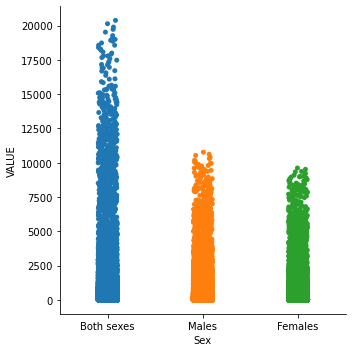

In [21]:
sns.catplot(x="Sex", y="VALUE", data=data2)

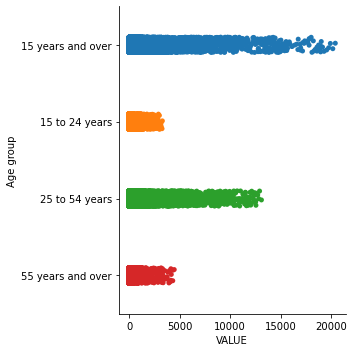

In [22]:
sns.catplot(x="VALUE", y="Age group", data=data2)

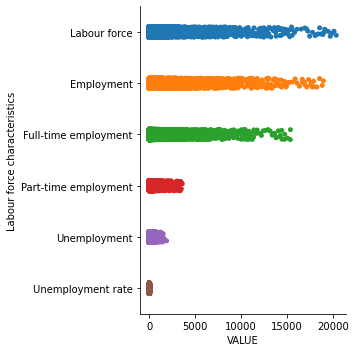

In [23]:
sns.catplot(x="VALUE", y="Labour force characteristics", data=data2)